In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [47]:
df = pd.read_csv('OLX_cars_dataset00.csv')
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [48]:
df.isnull().sum()

Ad ID                  0
Car Name               0
Make                   0
Model                  0
Year                   0
KM's driven            0
Price                  0
Fuel                   0
Registration city      0
Car documents          0
Assembly               0
Transmission           0
Condition              0
Seller Location        0
Description            0
Car Features           0
Images URL's           0
Car Profile          458
dtype: int64

In [49]:
df.shape

(9179, 18)

In [50]:
categorical_data = df.select_dtypes(include=['object','category'])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()


Ad ID                0
Car Name             0
Make                 0
Model                0
Year                 0
KM's driven          0
Price                0
Fuel                 0
Registration city    0
Car documents        0
Assembly             0
Transmission         0
Condition            0
Seller Location      0
Description          0
Car Features         0
Images URL's         0
Car Profile          0
dtype: int64

In [51]:
df.rename(columns={"Images URL's":'Images URL'}, inplace=True)

In [52]:
df.drop(['Ad ID','Images URL','Car Profile'], axis =1,inplace=True)
df

,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features
0,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett..."
1,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio
2,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers
3,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A..."
4,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,Suzuki Wagon R Japanese 660cc sale/exchange,Suzuki,Wagon R,2014,115000,2725000,Petrol,Islamabad,Original,Imported,Automatic,Used,"G-13, Islamabad",Japanese Wagon R 2014 Full automatic option Re...,"ABS, Air Bags, Air Conditioning, Alloy Rims, A..."
9175,wegon R VXL 2017,Suzuki,Wagon R,2017,100000,1850000,Petrol,Lahore,Original,Local,Manual,Used,"New Satellite Town, Sargodha",wegon r vxl 2017 model 2 piece touch Ac on new...,"Air Conditioning, CD Player, Power Steering, P..."
9176,Good condition,KIA,Spectra,2001,123456,1100000,Petrol,Lahore,Original,Imported,Automatic,Used,"Wahdat Colony, Taxila",karobar may invest karna hay,"Air Conditioning, AM/FM Radio, DVD Player, Pow..."
9177,Suzuki Alto vxr,Suzuki,Alto,2009,89000,970000,Petrol,Lahore,Original,Imported,Manual,Used,"Yar Hussain - Chota Lahor Rd, Swabi","Suzuki Alto Vxr \nAC, HEATER INSTALLED\nCNG, P...","Air Conditioning, AM/FM Radio, Front Speakers,..."


In [53]:
df.head(5)

,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features
0,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett..."
1,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio
2,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers
3,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A..."
4,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio..."


In [54]:
df.columns

Index(['Car Name', 'Make', 'Model', 'Year', 'KM's driven', 'Price', 'Fuel',
       'Registration city', 'Car documents', 'Assembly', 'Transmission',
       'Condition', 'Seller Location', 'Description', 'Car Features'],
      dtype='object')

In [55]:
encoder = LabelEncoder()
category = df.select_dtypes(include =['object','category'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features
0,6574,10,44,2021,54000,4190000,3,57,1,0,0,0,92,7369,46
1,4830,9,47,2018,95000,1300000,3,25,1,1,1,0,1399,5080,3192
2,4686,9,4,2015,50000,800000,3,25,1,1,1,0,1614,4993,5970
3,1509,2,42,2013,94000,2155000,3,30,1,0,0,0,1904,3970,1247
4,4482,9,52,2011,126544,1440000,3,25,1,1,1,0,2447,4853,2835


In [56]:
X = df.drop(['Car Name'],axis = 1) 
Y = df['Car Name'] 

In [57]:
from sklearn.utils import resample
df_0 = df[df['Car Name'] == 0]
df_1 = df[df['Car Name'] == 1]
df_2 = df[df['Car Name'] == 2]

df0_sam = resample(df_0, n_samples=2000)
df1_sam = resample(df_1, n_samples=2000)
df2_sam = resample(df_2, n_samples=2000)

df = pd.concat([df0_sam, df1_sam, df2_sam])
df = df.sample(frac = 1, ignore_index = True)
x = df.drop(['Car Name'], axis = 1)
y = df['Car Name']



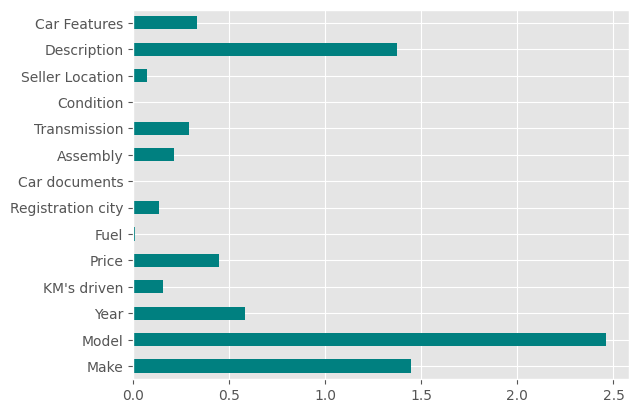

In [58]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(X,Y)
feature_impor = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impor.plot(kind = 'barh', color = 'teal')
plt.show()

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2,random_state=1)

In [60]:
LinearModel = LinearRegression() 
LinearModel.fit(xtrain,ytrain) 

LinearRegression()

In [61]:
pred1 = LinearModel.predict(xtest) 
pred1

array([4019.20050775, 2431.55620855, 5892.74348347, ..., 2455.63313732,
       4956.78439873, 3933.71576027])

In [62]:
print('MAE', mean_absolute_error(ytest,pred1))
print('MSE', mean_squared_error(ytest,pred1))
print('R2 SCORE', r2_score(ytest,pred1)) 

MAE 1553.2925127567069
MSE 3884794.5650243876
R2 SCORE 0.2312553407696557


In [63]:
tree = DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [64]:
pred2 = tree.predict(xtest)
pred2

array([2604., 3466., 5808., ..., 6673., 7199., 4091.])

In [65]:
print('MAE', mean_absolute_error(ytest,pred1))
print('MSE', mean_squared_error(ytest,pred1))
print('R2 SCORE', r2_score(ytest,pred1)) 

MAE 1553.2925127567069
MSE 3884794.5650243876
R2 SCORE 0.2312553407696557


In [66]:
from sklearn.pipeline import Pipeline
logreg = KNeighborsClassifier()

In [67]:
logreg.fit(xtrain,ytrain)

KNeighborsClassifier()

In [68]:
pred3 = logreg.predict(xtest)
pred3

array([2454, 1311, 2364, ...,  850, 3827,  639])

In [69]:
print('MAE', mean_absolute_error(ytest,pred1))
print('MSE', mean_squared_error(ytest,pred1))
print('R2 SCORE', r2_score(ytest,pred1)) 

MAE 1553.2925127567069
MSE 3884794.5650243876
R2 SCORE 0.2312553407696557
